/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


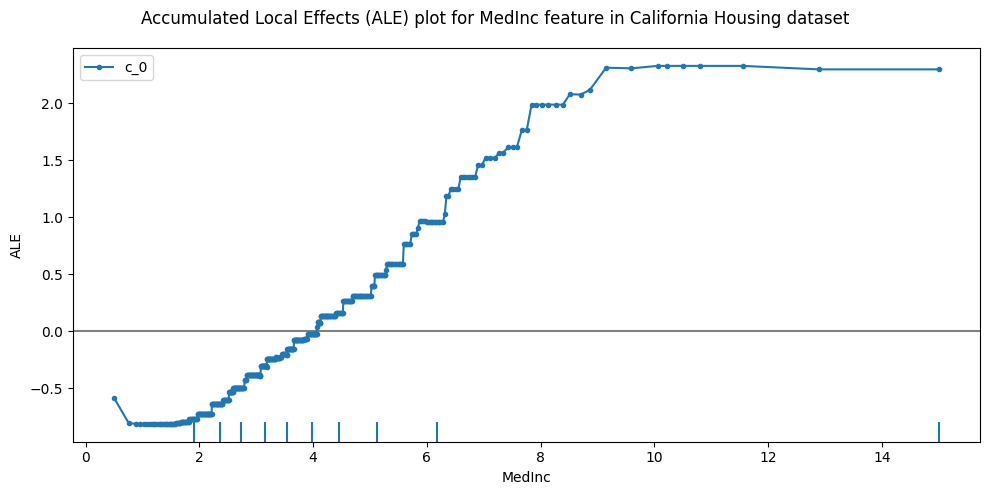

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale
import matplotlib.pyplot as plt

# Load the California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Create the ALE explainer and compute the ALE for 'MedInc' feature
explainer = ALE(model.predict, feature_names=california.feature_names)
ale_medinc = explainer.explain(X_train.values, features=[0])  # 0 corresponds to 'MedInc'

# Plot the ALE for 'MedInc' feature
plot_ale(ale_medinc, fig_kw={'figwidth': 10, 'figheight': 5})
plt.suptitle('Accumulated Local Effects (ALE) plot for MedInc feature in California Housing dataset')
plt.show()


From the ALE plot, we can observe how the median income (MedInc) feature affects the predicted median house value. The plot provides a centered, accumulated, and local estimation of how the feature values influence the predictions.
